# Matplotlib Practice Notebook (Beginners)

## Objectives
By the end of this 90-minute lab, you should be able to:

- Create line, scatter, and bar plots using **matplotlib**.
- Work with `fig, ax = plt.subplots(...)` (including multiple subplots).
- Customize plots: titles, labels, legends, styles, markers, alpha, grids, limits.
- Control ticks and tick labels (including rotation for bar charts).
- Add annotations with `ax.annotate(...)`.
- Use `fig.suptitle(...)` and `tight_layout(...)` to manage layout.
- Save figures with `plt.savefig("...png", dpi=...)`.

## Time plan (90 minutes total)
- **Setup & warm-up:** 5 min
- **Sociology (2 exercises):** 25 min
- **Geology (2 exercises):** 25 min
- **Microbiology (2 exercises):** 25 min
- **Capstone multi-panel figure (loop over subplots):** 10 min


In [1]:
# === STUDENT TASK ===
# Run this cell first (imports + consistent defaults)

import numpy as np
import matplotlib.pyplot as plt

# Reproducibility for synthetic data
rng = np.random.default_rng(42)

# Consistent plotting defaults (keep it simple and readable)
plt.rcParams.update({
    "figure.figsize": (8, 4.8),
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "legend.frameon": False,
})

# Helpful helper (optional): reset to defaults if needed
def reset_defaults():
    plt.rcParams.update(plt.rcParamsDefault)


## 1) Sociology — Commuting and satisfaction

**Scenario:** A city council ran a small survey across neighborhoods to understand commuting patterns and satisfaction with public transport. You will create plots that help compare neighborhoods and highlight differences between two groups (e.g., car vs public transport commuters).

You will generate a small synthetic dataset (no files, no pandas).


In [3]:
# Data generation (Sociology)
neighborhoods = ["Centro", "Norte", "Sur", "Este", "Oeste"]

# Average commute time (minutes) for two groups (synthetic)
commute_public = np.array([32, 38, 41, 35, 37])
commute_car    = np.array([28, 34, 39, 31, 33])

# Participation rate (%) in a local community program
participation = np.array([62, 55, 48, 59, 52])

# Satisfaction score (0–10) measured on a small sample
n_samples = 60
commute_time = rng.normal(loc=35, scale=6, size=n_samples).clip(15, 60)
satisfaction = (10 - 0.12 * commute_time + rng.normal(0, 0.8, size=n_samples)).clip(0, 10)

# A simple categorical label per respondent: 0 = public, 1 = car
group = rng.integers(0, 2, size=n_samples)


### Exercise 1A — Bar chart: participation by neighborhood (guided)

Make a **bar chart** of `participation` by `neighborhoods`.

**Figure requirements checklist**
- Use `fig, ax = plt.subplots()`.
- Use `ax.bar(...)` (not `plt.bar`).
- Set a **title** and **axis labels**.
- Use **custom tick labels** from `neighborhoods` and **rotate** them (e.g., 25–45°).
- Set a y-limit that makes sense (e.g., 0–80).
- Add a subtle grid (already enabled via defaults).
- Save the figure as `sociology_participation.png` with `dpi=150`.

**Common mistakes**
- Forgetting `ax.set_xticks(...)` *and* `ax.set_xticklabels(...)`.
- Rotating tick labels but not aligning them (`ha="right"`).
- Calling `plt.savefig(...)` before plotting or before `tight_layout()`.


In [4]:
# === STUDENT TASK ===
# TODO: create the bar chart with the required customizations

# TODO: fig, ax = ...
# TODO: ax.bar(...)
# TODO: ax.set_title(...), ax.set_xlabel(...), ax.set_ylabel(...)
# TODO: set ticks + tick labels, rotate labels
# TODO: ax.set_ylim(...)
# TODO: optional: annotate the highest bar with its value (bonus)
# TODO: fig.tight_layout()
# TODO: plt.savefig("sociology_participation.png", dpi=150)

plt.show()


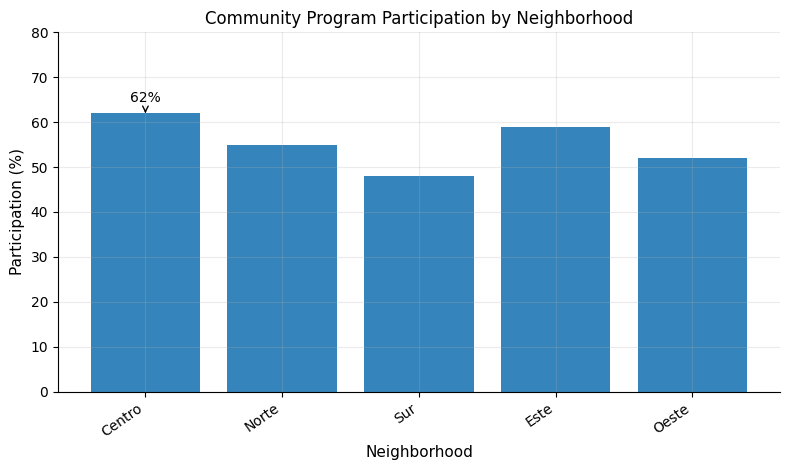

In [5]:
# === SOLUTION (INSTRUCTOR) ===
fig, ax = plt.subplots()

x = np.arange(len(neighborhoods))
bars = ax.bar(x, participation, alpha=0.9)

ax.set_title("Community Program Participation by Neighborhood")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Participation (%)")

ax.set_xticks(x)
ax.set_xticklabels(neighborhoods, rotation=35, ha="right")
ax.set_ylim(0, 80)

# Bonus: annotate the highest bar
imax = int(np.argmax(participation))
ax.annotate(f"{participation[imax]:.0f}%",
            xy=(x[imax], participation[imax]),
            xytext=(0, 8),
            textcoords="offset points",
            ha="center",
            arrowprops=dict(arrowstyle="->", lw=1))

fig.tight_layout()
plt.savefig("sociology_participation.png", dpi=150)
plt.show()


### Exercise 1B — Subplots: compare commute times by neighborhood (less guided)

Create a **two-panel figure** comparing average commute times:
- Left panel: `commute_public` by neighborhood
- Right panel: `commute_car` by neighborhood

**Figure requirements checklist**
- Create `fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)`.
- Plot each group as a **bar chart** (or line plot) in its own subplot.
- Use **consistent x positions** and **rotated neighborhood labels**.
- Add per-panel **titles** and a shared y-label (left axis is enough).
- Add `fig.suptitle(...)` for the entire figure.
- Use `tight_layout(rect=[0, 0, 1, 0.92])` to avoid overlap with the suptitle.
- Save as `sociology_commute_compare.png` with `dpi=150`.

**Common mistakes**
- Forgetting `sharey=True` (harder comparison).
- Using different y-limits in each panel.
- Calling `tight_layout()` *without* `rect=...` so the suptitle overlaps.


In [6]:
# === STUDENT TASK ===
# TODO: create 1x2 subplots and compare commute times

# TODO: define x positions with np.arange(...)
# TODO: fig, axes = plt.subplots(...)
# TODO: plot public on axes[0], car on axes[1]
# TODO: customize titles, labels, ticks, limits
# TODO: fig.suptitle(...)
# TODO: fig.tight_layout(rect=[...])
# TODO: plt.savefig(...)

plt.show()


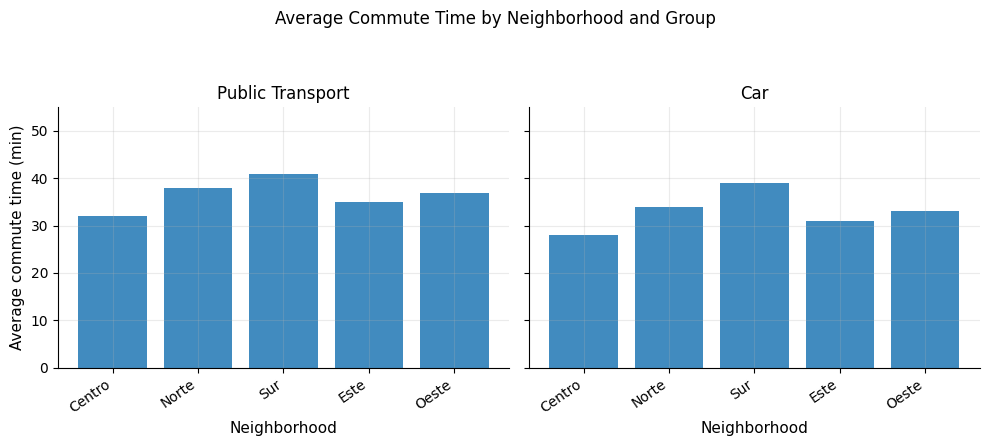

In [7]:
# === SOLUTION (INSTRUCTOR) ===
x = np.arange(len(neighborhoods))

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

axes[0].bar(x, commute_public, alpha=0.85)
axes[0].set_title("Public Transport")
axes[0].set_ylabel("Average commute time (min)")

axes[1].bar(x, commute_car, alpha=0.85)
axes[1].set_title("Car")

for ax in axes:
    ax.set_xticks(x)
    ax.set_xticklabels(neighborhoods, rotation=35, ha="right")
    ax.set_xlabel("Neighborhood")
    ax.set_ylim(0, 55)

fig.suptitle("Average Commute Time by Neighborhood and Group")
fig.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("sociology_commute_compare.png", dpi=150)
plt.show()


## 2) Geology — Temperature gradient with depth

**Scenario:** You are analyzing a simplified temperature profile from a borehole. Depth increases downward, and you want a plot that matches geological conventions (depth on the vertical axis, increasing downward). You also want to mark a boundary layer (e.g., the base of a sediment layer).

You will generate synthetic depth–temperature data and visualize it with clear geological conventions.


In [ ]:
# Data generation (Geology)
# Depth in meters (0 = surface)
depth = np.linspace(0, 2500, 80)

# Synthetic geothermal gradient with gentle curvature + noise
temp_surface = 12.0
gradient = 0.028  # °C per meter (synthetic; not realistic everywhere)
temperature = temp_surface + gradient * depth + 8*np.log1p(depth/500) + rng.normal(0, 1.2, size=depth.size)

# A boundary layer depth (e.g., base of sediments)
boundary_depth = 900  # meters


### Exercise 2A — Depth vs temperature line plot (guided)

Plot **temperature vs depth** with geology-friendly conventions.

**Figure requirements checklist**
- Use `fig, ax = plt.subplots()`.
- Use `ax.plot(temperature, depth, ...)` (note the order: x=temperature, y=depth).
- Invert the y-axis so depth increases downward (`ax.invert_yaxis()`).
- Add a horizontal reference line at `boundary_depth` (`ax.axhline(...)`).
- Label axes with units and add a title.
- Customize line style: marker, linewidth, alpha.
- Set sensible x-limits (optional) and y-limits (0 to 2500).
- Add an annotation pointing to the boundary line using `ax.annotate(...)`.
- Save as `geology_temp_profile.png` with `dpi=150`.

**Common mistakes**
- Plotting `ax.plot(depth, temperature)` (axes swapped).
- Forgetting `invert_yaxis()` (depth looks wrong).
- Adding the reference line but not labeling/annotating what it means.


In [ ]:
# === STUDENT TASK ===
# TODO: create the geology temperature profile plot

# TODO: fig, ax = ...
# TODO: ax.plot(temperature, depth, ...)
# TODO: ax.invert_yaxis()
# TODO: ax.axhline(boundary_depth, ...)
# TODO: title, labels, limits
# TODO: ax.annotate(...) labeling the boundary
# TODO: fig.tight_layout()
# TODO: plt.savefig("geology_temp_profile.png", dpi=150)

plt.show()


In [ ]:
# === SOLUTION (INSTRUCTOR) ===
fig, ax = plt.subplots()

ax.plot(temperature, depth, marker="o", linewidth=2, alpha=0.85, label="Borehole profile")

ax.invert_yaxis()
ax.set_title("Synthetic Borehole Temperature Profile")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Depth (m)")
ax.set_ylim(2500, 0)  # consistent with invert_yaxis

ax.axhline(boundary_depth, linestyle="--", linewidth=1.8, alpha=0.9, label="Boundary layer")

# Annotate boundary
ax.annotate("Boundary layer",
            xy=(np.median(temperature), boundary_depth),
            xytext=(np.median(temperature) + 10, boundary_depth + 350),
            arrowprops=dict(arrowstyle="->", lw=1),
            ha="left")

ax.legend()
fig.tight_layout()
plt.savefig("geology_temp_profile.png", dpi=150)
plt.show()


### Exercise 2B — Two profiles + shaded strata (less guided)

Create a plot showing **two temperature profiles** (e.g., two nearby boreholes), and shade a shallow layer (e.g., sediments).

**Figure requirements checklist**
- Generate a second profile `temperature2` by adding a small offset + noise.
- Plot both profiles on the same axes with different styles (linestyle/marker).
- Shade the sediment layer from depth 0 to 400 m using `ax.axhspan(0, 400, ...)`.
- Invert y-axis for depth.
- Add legend, title, labels.
- Use axis limits to keep it tidy.
- Save as `geology_two_profiles.png` with `dpi=150`.

**Common mistakes**
- Using `axvspan` instead of `axhspan` for a depth band.
- Forgetting transparency (`alpha`) so the shading hides the data.
- Profiles too visually similar (no distinct style).


In [ ]:
# === STUDENT TASK ===
# TODO: build a second profile and plot two lines + shaded strata

# TODO: create temperature2
# TODO: fig, ax = ...
# TODO: ax.axhspan(0, 400, ...)
# TODO: plot both profiles with distinct styles
# TODO: invert y-axis, labels, legend, limits
# TODO: save figure

plt.show()


In [ ]:
# === SOLUTION (INSTRUCTOR) ===
temperature2 = temperature + 3.5 + rng.normal(0, 1.0, size=temperature.size)

fig, ax = plt.subplots()

ax.axhspan(0, 400, alpha=0.15, label="Sediment layer (0–400 m)")

ax.plot(temperature, depth, marker="o", linewidth=2, alpha=0.8, label="Borehole A")
ax.plot(temperature2, depth, marker="s", linewidth=2, alpha=0.8, linestyle="--", label="Borehole B")

ax.invert_yaxis()
ax.set_title("Two Synthetic Temperature Profiles with Shallow Layer")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Depth (m)")
ax.set_ylim(2500, 0)

ax.legend()
fig.tight_layout()
plt.savefig("geology_two_profiles.png", dpi=150)
plt.show()


## 3) Microbiology — Growth under two conditions + temperature as a third variable

**Scenario:** You are comparing bacterial growth under two nutrient conditions. You measured optical density (OD) over time with a few replicate runs. You also recorded incubation temperature for each replicate and want a scatter plot where **color encodes temperature** (with a colorbar).

You will build small synthetic arrays (replicates, no large datasets).


In [ ]:
# Data generation (Microbiology)
time_h = np.linspace(0, 12, 25)

def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Two conditions (nutrient A vs B)
K_A, r_A, t0_A = 1.0, 0.85, 5.0
K_B, r_B, t0_B = 0.8, 0.65, 5.6

n_reps = 4
temps_C = rng.uniform(28, 37, size=n_reps)  # incubation temperature per replicate

# Replicate curves with small noise
OD_A = np.vstack([logistic(time_h, K_A, r_A, t0_A) + rng.normal(0, 0.03, size=time_h.size) for _ in range(n_reps)])
OD_B = np.vstack([logistic(time_h, K_B, r_B, t0_B) + rng.normal(0, 0.03, size=time_h.size) for _ in range(n_reps)])

OD_A = OD_A.clip(0, None)
OD_B = OD_B.clip(0, None)

# For scatter: summarize each replicate at final time point
final_OD = np.concatenate([OD_A[:, -1], OD_B[:, -1]])
condition = np.array(["Nutrient A"] * n_reps + ["Nutrient B"] * n_reps)
temp_scatter = np.concatenate([temps_C, temps_C])  # reuse temperatures for simple coloring


### Exercise 3A — Replicate growth curves (guided)

Create a **line plot** of growth curves over time for both conditions, showing replicates clearly.

**Figure requirements checklist**
- Use `fig, ax = plt.subplots()`.
- Plot all replicates for condition A and B.
- Use different **markers or linestyles** for the two conditions.
- Use `alpha` so replicates don’t visually dominate.
- Add a legend (hint: label only once per condition, or label each replicate clearly).
- Set title and axis labels.
- Set y-limits to keep it tidy (e.g., 0 to 1.1).
- Save as `micro_growth_replicates.png` with `dpi=150`.

**Common mistakes**
- Adding a legend entry for every line (legend becomes unreadable).
- Not using alpha, so lines overlap into a dark blob.
- Forgetting to label axes with units (hours).


In [ ]:
# === STUDENT TASK ===
# TODO: plot replicate growth curves for Nutrient A and B

# TODO: fig, ax = ...
# TODO: loop over replicates and plot OD_A and OD_B
# TODO: choose styles (marker/linestyle/linewidth/alpha)
# TODO: add legend, labels, title, limits
# TODO: tight_layout + savefig

plt.show()


In [ ]:
# === SOLUTION (INSTRUCTOR) ===
fig, ax = plt.subplots()

# Label only once per condition to keep legend clean
for i in range(n_reps):
    ax.plot(time_h, OD_A[i], marker="o", linewidth=2, alpha=0.6,
            label="Nutrient A (replicates)" if i == 0 else None)
    ax.plot(time_h, OD_B[i], marker="s", linewidth=2, alpha=0.6, linestyle="--",
            label="Nutrient B (replicates)" if i == 0 else None)

ax.set_title("Bacterial Growth Curves with Replicates")
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Optical Density (OD)")
ax.set_ylim(0, 1.1)

ax.legend()
fig.tight_layout()
plt.savefig("micro_growth_replicates.png", dpi=150)
plt.show()


### Exercise 3B — Scatter: final OD colored by temperature (less guided)

Create a **scatter plot** where:
- x-axis = replicate index (or two-category x positions)
- y-axis = `final_OD`
- color = `temp_scatter` using a colormap
- include a **colorbar**

**Figure requirements checklist**
- Use `fig, ax = plt.subplots()`.
- Use `ax.scatter(..., c=temp_scatter, cmap=..., alpha=..., s=...)`.
- Add a **colorbar** labeled “Temperature (°C)”.
- Use markers (or edgecolors) to distinguish conditions A vs B (replicates).
- Customize ticks to show clear grouping or labeling for conditions.
- Add title and axis labels.
- Save as `micro_finalOD_temp_scatter.png` with `dpi=150`.

**Common mistakes**
- Forgetting to store the return value of `ax.scatter(...)` (needed for colorbar).
- Using `plt.colorbar()` without passing the scatter mappable (can attach to wrong axes).
- Not labeling which points are Nutrient A vs B.


In [ ]:
# === STUDENT TASK ===
# TODO: make a scatter plot of final OD colored by temperature

# Hint idea: create x positions 0..(2*n_reps-1), then split by condition
# TODO: x = np.arange(...)
# TODO: fig, ax = ...
# TODO: scatter A points and B points with different markers, same c=temp_scatter slices
# TODO: add colorbar for temperature
# TODO: labels, title, ticks
# TODO: save figure

plt.show()


In [ ]:
# === SOLUTION (INSTRUCTOR) ===
x = np.arange(2 * n_reps)

fig, ax = plt.subplots()

mask_A = condition == "Nutrient A"
mask_B = condition == "Nutrient B"

scA = ax.scatter(x[mask_A], final_OD[mask_A],
                 c=temp_scatter[mask_A], cmap="viridis",
                 marker="o", s=90, alpha=0.85, label="Nutrient A")

scB = ax.scatter(x[mask_B], final_OD[mask_B],
                 c=temp_scatter[mask_B], cmap="viridis",
                 marker="s", s=90, alpha=0.85, label="Nutrient B")

cbar = fig.colorbar(scB, ax=ax)
cbar.set_label("Temperature (°C)")

ax.set_title("Final OD by Replicate (Color = Temperature)")
ax.set_xlabel("Replicate (grouped by condition)")
ax.set_ylabel("Final OD")

ax.set_xticks(x)
ax.set_xticklabels([f"A{i+1}" for i in range(n_reps)] + [f"B{i+1}" for i in range(n_reps)],
                   rotation=30, ha="right")

ax.set_ylim(0, 1.2)
ax.legend()

fig.tight_layout()
plt.savefig("micro_finalOD_temp_scatter.png", dpi=150)
plt.show()


## 4) Capstone — Multi-panel figure using a loop over subplots

**Goal:** Generate a **multi-panel figure** with `plt.subplots(2, 2, ...)` and fill each panel using a loop:

```python
for ax, key in zip(axes.flat, keys):
    ...
```

You will plot four “conditions” of growth curves (e.g., different antibiotic concentrations) and save the final figure.

This is the last exercise; it should feel like assembling everything you have practiced.


In [ ]:
# Data generation (Capstone)
# Four conditions (e.g., antibiotic concentration in ug/mL)
keys = ["0 ug/mL", "1 ug/mL", "2 ug/mL", "4 ug/mL"]
concs = np.array([0, 1, 2, 4])

# Create four growth curves with increasing inhibition
time_h2 = np.linspace(0, 12, 30)
base = logistic(time_h2, K=1.0, r=0.85, t0=5.1)

curves = {}
for c, label in zip(concs, keys):
    # Inhibition: lower carrying capacity and slightly slower growth
    K = 1.0 - 0.12 * c
    r = 0.85 - 0.05 * c
    curve = logistic(time_h2, K=K, r=r, t0=5.1) + rng.normal(0, 0.02, size=time_h2.size)
    curves[label] = curve.clip(0, None)


### Capstone Exercise — 2×2 subplots filled in a loop

**Figure requirements checklist**
- Create `fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)`.
- Loop: `for ax, key in zip(axes.flat, keys): ...`
- In each subplot:
  - plot `curves[key]` vs `time_h2` (line plot)
  - set a **per-panel title** using the key (condition label)
  - set axis labels (consistent across panels)
- Add `fig.suptitle(...)` for the full figure.
- Add at least **one annotation** in exactly one panel (e.g., annotate the max value for `"0 ug/mL"`).
- Use a consistent style across panels (linewidth, marker, alpha).
- Use at least one **shared legend strategy**:
  - either `ax.legend()` in each panel **or**
  - a single figure-level legend (recommended): `fig.legend(...)`
- Use `tight_layout(rect=[0, 0, 1, 0.93])` to make space for the suptitle.
- Save to `capstone_multipanel.png` with `dpi=200`.

**Common mistakes**
- Forgetting `.flat` when looping over `axes`.
- Calling `tight_layout()` without `rect=...` and overlapping the suptitle.
- Inconsistent axis limits between panels (hard to compare).


In [ ]:
# === STUDENT TASK ===
# TODO: build the multi-panel figure using a loop over subplots

# TODO: fig, axes = plt.subplots(2, 2, ...)
# TODO: for ax, key in zip(axes.flat, keys):
#           ax.plot(...)
#           ax.set_title(...)
#           ax.set_xlabel(...)
#           ax.set_ylabel(...)
# TODO: add a fig.suptitle(...)
# TODO: add ONE annotation in ONE panel using ax.annotate(...)
# TODO: add legend strategy (per-axes or figure-level)
# TODO: fig.tight_layout(rect=[0, 0, 1, 0.93])
# TODO: plt.savefig("capstone_multipanel.png", dpi=200)

plt.show()


In [ ]:
# === SOLUTION (INSTRUCTOR) ===
fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)

# Keep a single handle for the legend (same label in all panels)
line_handle = None

for ax, key in zip(axes.flat, keys):
    (ln,) = ax.plot(time_h2, curves[key], linewidth=2.2, marker="o", alpha=0.75, label="OD vs time")
    line_handle = ln  # same label each time

    ax.set_title(key)
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Optical Density (OD)")
    ax.set_ylim(0, 1.1)

    # One annotation in exactly one panel
    if key == "0 ug/mL":
        y = curves[key]
        imax = int(np.argmax(y))
        ax.annotate("Peak",
                    xy=(time_h2[imax], y[imax]),
                    xytext=(time_h2[imax] + 1.0, y[imax] - 0.15),
                    arrowprops=dict(arrowstyle="->", lw=1),
                    ha="left")

fig.suptitle("Growth Curves Under Different Antibiotic Concentrations")

# Figure-level legend (shared strategy)
fig.legend(handles=[line_handle], labels=["Growth curve (replicate mean)"],
           loc="upper right", bbox_to_anchor=(0.98, 0.94))

fig.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("capstone_multipanel.png", dpi=200)
plt.show()
